## Intro to TensorFlow

Tutorial link(s):
* https://www.youtube.com/watch?v=PcstG8qiObc

### Sequential API

In [18]:

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Get the data

In [19]:
mnist = keras.datasets.mnist

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.

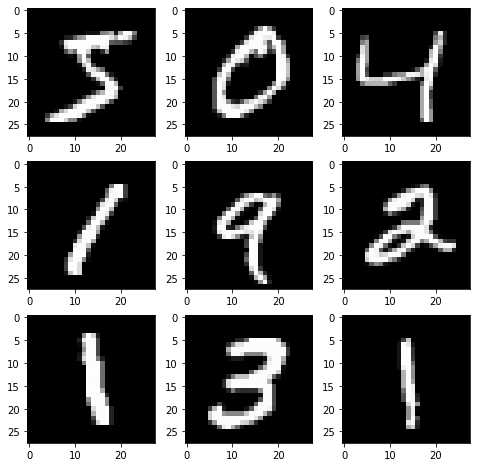

In [21]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

### Build the model

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
# hyperparameters
batch_size = 64
epochs = 5
learning_rate = 0.001

In [25]:
# plain Categorical reserved for one-hot encoded
# we are using raw as opposed to softmax outputs -> from_logits=True
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [26]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 3s - loss: 0.3066 - accuracy: 0.9142 - 3s/epoch - 3ms/step
Epoch 2/5
938/938 - 1s - loss: 0.1391 - accuracy: 0.9601 - 840ms/epoch - 895us/step
Epoch 3/5
938/938 - 1s - loss: 0.0956 - accuracy: 0.9716 - 850ms/epoch - 906us/step
Epoch 4/5
938/938 - 1s - loss: 0.0724 - accuracy: 0.9779 - 819ms/epoch - 873us/step
Epoch 5/5
938/938 - 1s - loss: 0.0568 - accuracy: 0.9828 - 1s/epoch - 1ms/step


### Evaluate the model

In [28]:
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 1s - loss: 0.0758 - accuracy: 0.9764 - 983ms/epoch - 6ms/step


[0.0757705494761467, 0.9764000177383423]

### Perform some predictions

In [31]:
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax(),
])

predictions = probability_model(x_test)

In [32]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.3547960e-07, 6.7595582e-09, 3.5757232e-05, 5.1104012e-03,
       1.8424735e-09, 4.1446469e-06, 1.5072829e-10, 9.9480361e-01,
       5.5981209e-06, 4.0193274e-05], dtype=float32)>

In [33]:
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)

In [38]:
np.argmax( predictions[0] )

7

In [37]:
np.argmax( model.predict(x_test, batch_size=batch_size)[0] )

7